In [2]:
import pandas as pd

# Load the dataset
file_path = r'C:/Users/mohameds/OneDrive/Documents/GitHub/MAIN_CV_PROJECTS/web2/archive (8)/Youtube-Spam-Dataset.csv'
youtube_spam = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(youtube_spam.head())


                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

                       VIDEO_NAME  CLASS  
0  PSY - GANGNAM STYLE(?????) M/V      1  
1  PSY - GANGNAM STYLE(?????) M/V      1  

## Performing a EDA

In [3]:
youtube_spam.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
VIDEO_NAME      0
CLASS           0
dtype: int64


In [10]:
# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

COMMENT_ID     0.000000
AUTHOR         0.000000
DATE          12.525562
CONTENT        0.000000
VIDEO_NAME     0.000000
CLASS          0.000000
dtype: float64


In [11]:
youtube_spam = youtube_spam.dropna()
youtube_spam.isnull().sum()

COMMENT_ID        0
AUTHOR            0
DATE              0
CONTENT           0
VIDEO_NAME        0
CLASS             0
comment_length    0
dtype: int64

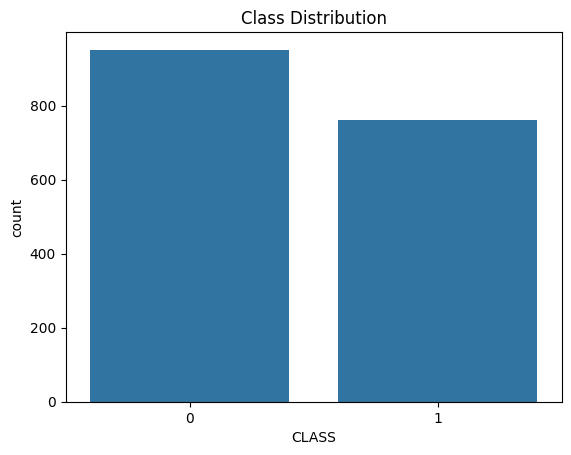

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
sns.countplot(x='CLASS', data=youtube_spam)
plt.title('Class Distribution')
plt.show()

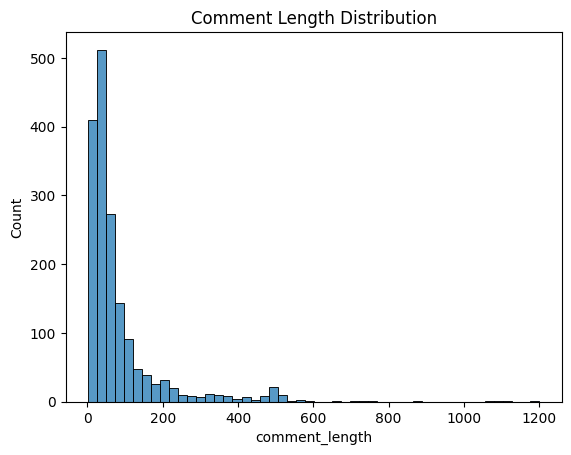

In [13]:
# Comment length distribution
youtube_spam['comment_length'] = youtube_spam['CONTENT'].apply(len)
sns.histplot(youtube_spam['comment_length'], bins=50)
plt.title('Comment Length Distribution')
plt.show()

In [15]:
# Display some basic statistics
print(youtube_spam.describe())


             CLASS  comment_length
count  1711.000000     1711.000000
mean      0.444185       83.789012
std       0.497020      117.046422
min       0.000000        2.000000
25%       0.000000       26.000000
50%       0.000000       44.000000
75%       1.000000       86.000000
max       1.000000     1200.000000


## Propessing the data

In [16]:

import string
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply preprocessing to the content
youtube_spam['cleaned_content'] = youtube_spam['CONTENT'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohameds\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Feature Extraction

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(youtube_spam['cleaned_content'])
y = youtube_spam['CLASS']


## Train the Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8746355685131195
Confusion Matrix:
[[181   6]
 [ 37 119]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       187
           1       0.95      0.76      0.85       156

    accuracy                           0.87       343
   macro avg       0.89      0.87      0.87       343
weighted avg       0.89      0.87      0.87       343



## Save the Model and Vectorizer

In [20]:
import pickle

# Save the model
with open('random_forest_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Save the TfidfVectorizer
with open('tfidf_rf.pkl', 'wb') as file:
    pickle.dump(tfidf, file)
